In [15]:
import requests
import pandas as pd
import numpy as np
import random
from citipy import citipy
from config import api_key
import matplotlib.pyplot as plt


In [16]:
plt.style.use("seaborn")

In [17]:
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)

In [18]:
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""


In [19]:
# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.head()


,Latitude,Longitude
0,-169.33,-398.28
1,-168.11,-398.85
2,-169.93,-388.07
3,-175.83,-399.56
4,-177.01,-389.02


In [20]:
cities_df.shape

(16200, 2)

In [21]:
cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

In [25]:
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df.head()

,Closest City name,Closest Country code
0,vaini,to
1,vaini,to
2,vaini,to
3,vaini,to
4,vaini,to


In [11]:
clean_cities_df = clean_cities_df.drop_duplicates()
clean_cities_df.shape


(880, 2)

In [12]:
selected_cities = clean_cities_df.sample(500)
selected_cities = selected_cities.reset_index(drop=True)
selected_cities.shape

(500, 2)

In [13]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
app_id = api_key
params = { "appid" :app_id,"units":"metric" }


In [12]:
def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))
    

Retrieving weather information for katakwi,ug
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=katakwi%2Cug
Retrieving weather information for mackay,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mackay%2Cau
Retrieving weather information for marcona,pe
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=marcona%2Cpe
Retrieving weather information for kota kinabalu,my
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kota+kinabalu%2Cmy
Retrieving weather information for yankton,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yankton%2Cus
Retrieving weather information for iquique,cl
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=iquique%2Ccl
Retrieving weather information for mount isa,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mount+isa%2Cau
Retrieving weather informat

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=byron+bay%2Cau
Retrieving weather information for vila velha,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vila+velha%2Cbr
Retrieving weather information for chernyshevskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chernyshevskiy%2Cru
Retrieving weather information for madison,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=madison%2Cus
Retrieving weather information for llanes,es
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=llanes%2Ces
Retrieving weather information for safranbolu,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=safranbolu%2Ctr
Retrieving weather information for cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=cape+town%2Cza
Retrieving weather information for nuuk,gl
http://api.ope

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=neiafu%2Cto
Retrieving weather information for dongkan,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dongkan%2Ccn
Retrieving weather information for pointe michel,dm
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pointe+michel%2Cdm
Retrieving weather information for vardo,no
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vardo%2Cno
Retrieving weather information for atka,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=atka%2Cru
Retrieving weather information for miami,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=miami%2Cus
Retrieving weather information for polunochnoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=polunochnoye%2Cru
Retrieving weather information for romitan,uz
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vagur%2Cfo
Retrieving weather information for iwanai,jp
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=iwanai%2Cjp
Retrieving weather information for jamsa,fi
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=jamsa%2Cfi
Retrieving weather information for fez,ma
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=fez%2Cma
Retrieving weather information for obo,cf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=obo%2Ccf
Retrieving weather information for tartagal,ar
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tartagal%2Car
Retrieving weather information for kudat,my
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kudat%2Cmy
Retrieving weather information for tsihombe,mg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&uni

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=belyy+yar%2Cru
Retrieving weather information for manado,id
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=manado%2Cid
Retrieving weather information for egvekinot,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=egvekinot%2Cru
Retrieving weather information for koygorodok,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=koygorodok%2Cru
Retrieving weather information for talnakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=talnakh%2Cru
Retrieving weather information for yambio,sd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yambio%2Csd
Retrieving weather information for sao filipe,cv
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sao+filipe%2Ccv
Retrieving weather information for kodiak,us
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rikitea%2Cpf
Retrieving weather information for pochutla,mx
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pochutla%2Cmx
Retrieving weather information for mamallapuram,in
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mamallapuram%2Cin
Retrieving weather information for zaoyang,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=zaoyang%2Ccn
Retrieving weather information for luangwa,zm
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=luangwa%2Czm
Retrieving weather information for masindi,ug
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=masindi%2Cug
Retrieving weather information for yulara,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yulara%2Cau
Retrieving weather information for rakhya,ru
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=hays%2Cus
Retrieving weather information for half moon bay,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=half+moon+bay%2Cus
Retrieving weather information for homer,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=homer%2Cus
Retrieving weather information for baker city,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=baker+city%2Cus
Retrieving weather information for takoradi,gh
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=takoradi%2Cgh
Retrieving weather information for cap malheureux,mu
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=cap+malheureux%2Cmu
Retrieving weather information for tuktoyaktuk,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tuktoyaktuk%2Cca
Retrieving weather information for bafq,ir
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vila+franca+do+campo%2Cpt
Retrieving weather information for akcakoca,tr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=akcakoca%2Ctr
Retrieving weather information for madinat sittah uktubar,eg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=madinat+sittah+uktubar%2Ceg
Retrieving weather information for villamontes,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=villamontes%2Cbo
Retrieving weather information for esperance,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=esperance%2Cau
Retrieving weather information for grand river south east,mu
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=grand+river+south+east%2Cmu
Retrieving weather information for alayao,ph
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=alayao%2Cph
Re

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=melilla%2Ces
Retrieving weather information for baherden,tm
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=baherden%2Ctm
Retrieving weather information for kysyl-syr,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kysyl-syr%2Cru
Retrieving weather information for monticello,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=monticello%2Cus
Retrieving weather information for broome,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=broome%2Cau
Retrieving weather information for birao,cf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=birao%2Ccf
Retrieving weather information for port said,eg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=port+said%2Ceg
Retrieving weather information for nea vissa,gr
http://api.openweathermap.org

In [13]:
selected_cities = selected_cities.dropna()
selected_cities.shape

(425, 8)

In [14]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

In [15]:
selected_cities.describe()


,Latitude,Longitude,Temperature,Wind speed,Humidity,Cloudiness
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,20.821200,12.738565,13.700471,3.759976,73.804706,39.291765
std,32.113161,85.835983,15.518391,2.662900,22.260825,34.335327
min,-54.800000,-179.170000,-28.000000,0.100000,8.000000,0.000000
25%,-2.890000,-64.180000,2.850000,1.620000,61.000000,1.000000
50%,29.820000,22.680000,18.430000,3.100000,78.000000,36.000000
75%,43.070000,80.550000,26.500000,5.100000,93.000000,75.000000
max,78.220000,178.420000,37.630000,15.000000,100.000000,100.000000


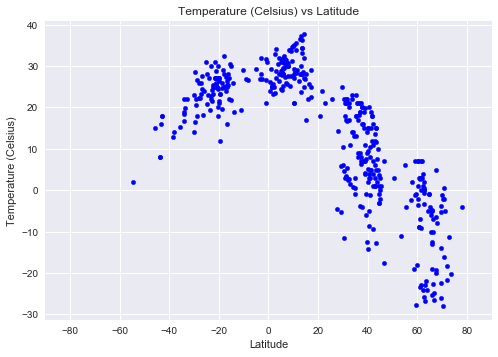

In [16]:

#selected_cities["Longitude"] = pd.to_numeric(selected_cities["Longitude"])
#selected_cities["Latitude"] = pd.to_numeric(selected_cities["Latitude"])
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.show()

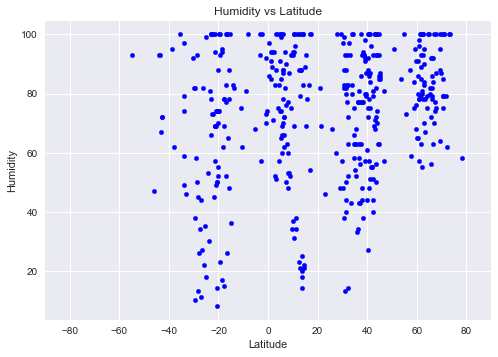

In [22]:
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.show()

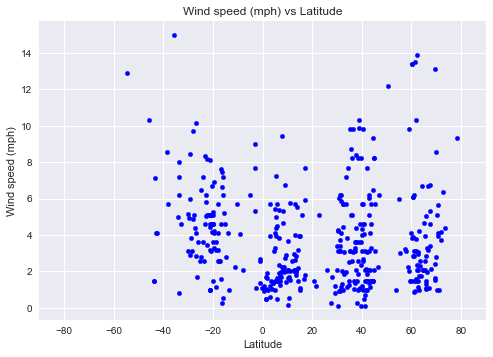

In [23]:
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.show()


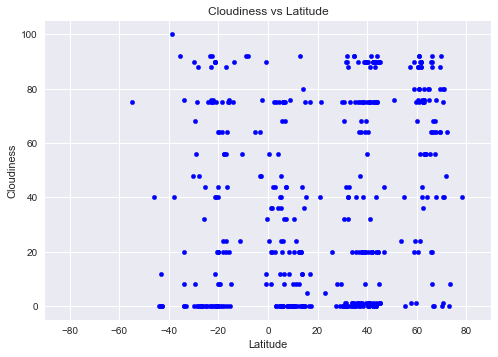

In [24]:
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.show()
